In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set(style="whitegrid")

In [2]:
# Number of transactions to simulate
num_records = 5000

rng = np.random.default_rng(2026)

# Possible Chinese meal categories
meal_types = ["Dim Sum", "Kung Pao Chicken", "Sweet & Sour Pork", 
              "Fried Rice", "Spring Rolls", "Hot Pot", "Noodles"]

# Generate random dataset
data = {
    "transaction_id": range(1, num_records+1),
    "meal_type": rng.choice(meal_types, size=num_records),
    "sales_amount": np.round(rng.uniform(8.0, 70.0, size=num_records),2),
    "cost_of_goods_sold": np.round(rng.uniform(3.0, 45.0, size=num_records),2),
    # demographic info
    "customer_age": rng.integers(18, 70, size=num_records),
    "customer_gender": rng.choice(["Male","Female","Non-Binary"], size=num_records),
    "customer_income_bracket": rng.choice(
        ["Low", "Middle", "High"], size=num_records, p=[0.3, 0.5, 0.2])
}

df = pd.DataFrame(data)

In [3]:
# Compute profit values
df["profit"] = df["sales_amount"] - df["cost_of_goods_sold"]

# Profit margin as percentage
df["profit_margin_pct"] = np.round(100 * df["profit"] / df["sales_amount"], 2)

df.head()

,transaction_id,meal_type,sales_amount,cost_of_goods_sold,customer_age,customer_gender,customer_income_bracket,profit,profit_margin_pct
0,1,Hot Pot,27.88,29.05,58,Non-Binary,High,-1.17,-4.20
1,2,Kung Pao Chicken,20.85,25.70,63,Male,Middle,-4.85,-23.26
2,3,Dim Sum,20.27,16.08,50,Non-Binary,Low,4.19,20.67
3,4,Spring Rolls,22.70,11.59,19,Non-Binary,Low,11.11,48.94
4,5,Sweet & Sour Pork,42.03,25.91,66,Female,High,16.12,38.35


In [4]:
df.describe(include='all')

,transaction_id,meal_type,sales_amount,cost_of_goods_sold,customer_age,customer_gender,customer_income_bracket,profit,profit_margin_pct
count,5000.000000,5000,5000.000000,5000.000000,5000.000000,5000,5000,5000.000000,5000.000000
unique,NaN,7,NaN,NaN,NaN,3,3,NaN,NaN
top,NaN,Spring Rolls,NaN,NaN,NaN,Female,Middle,NaN,NaN
freq,NaN,752,NaN,NaN,NaN,1742,2507,NaN,NaN
mean,2500.500000,NaN,39.258554,24.201506,43.375200,NaN,NaN,15.057048,16.347488
std,1443.520003,NaN,17.849470,12.132538,15.033683,NaN,NaN,21.662977,74.923719
min,1.000000,NaN,8.010000,3.010000,18.000000,NaN,NaN,-35.390000,-401.700000
25%,1250.750000,NaN,23.820000,13.780000,30.000000,NaN,NaN,-1.022500,-3.517500
50%,2500.500000,NaN,39.360000,24.110000,43.000000,NaN,NaN,15.115000,38.205000
75%,3750.250000,NaN,54.462500,34.642500,56.000000,NaN,NaN,30.872500,65.145000


In [5]:
sales_by_meal = df.groupby("meal_type")[["sales_amount","profit","profit_margin_pct"]].mean().sort_values("sales_amount", ascending=False)
sales_by_meal

,sales_amount,profit,profit_margin_pct
meal_type,,,
Hot Pot,39.964203,15.938590,17.522482
Spring Rolls,39.818364,15.204747,16.290186
Noodles,39.698301,15.541989,20.269517
Sweet & Sour Pork,39.166971,15.504260,16.758603
Dim Sum,39.027830,15.223520,16.731236
Fried Rice,38.663205,14.224756,13.666263
Kung Pao Chicken,38.410417,13.717803,13.039193


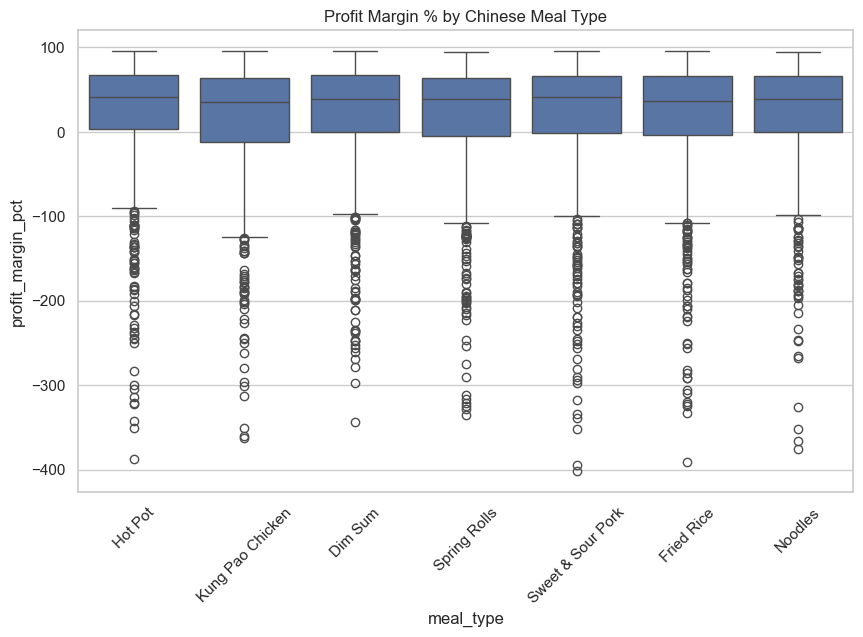

In [6]:
plt.figure(figsize=(10,6))
sns.boxplot(x="meal_type", y="profit_margin_pct", data=df)
plt.xticks(rotation=45)
plt.title("Profit Margin % by Chinese Meal Type")
plt.show()

In [7]:
demographics_summary = df.groupby("customer_income_bracket")[["sales_amount","profit"]].agg(["mean","count"])
demographics_summary

sales_amount           profit      
                                mean count       mean count
customer_income_bracket                                    
High                       38.879920   994  14.682032   994
Low                        39.635704  1499  15.883115  1499
Middle                     39.183171  2507  14.711811  2507

In [8]:
df.to_csv("chinese_meals_sales_demographics.csv", index=False)
print("Saved dataset to 'chinese_meals_sales_demographics.csv'")

Saved dataset to 'chinese_meals_sales_demographics.csv'
